In [1]:
#copied from https://towardsdatascience.com/k-means-clustering-algorithm-applications-evaluation-methods-and-drawbacks-aa03e644b48a
import matplotlib.pyplot as plt
from matplotlib.image import imread
from sklearn.cluster import KMeans, SpectralClustering
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_samples, silhouette_score
from sklearn.datasets import load_iris
import numpy as np

# **For 2.1**

In [8]:
# Loading all features 0, 1, 2, 3 of the data
iris = load_iris()
X = iris.data[:, [0,1,2,3]]

In [9]:
#Review on how to find 2D PCA for the 4D data
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
X_PCA_2D = pca.fit_transform(X)

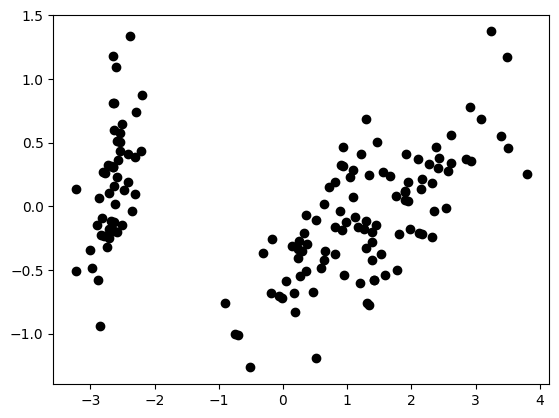

In [10]:
#Plotting transformed data
plt.scatter(X_PCA_2D[:,0] , X_PCA_2D[:,1] , color = 'black')
plt.show()

## **For 2.2**

In [ ]:
# Loading some example data
iris = load_iris()
X = iris.data[:, [0,2]]
y = iris.target
print(iris.feature_names)

['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']


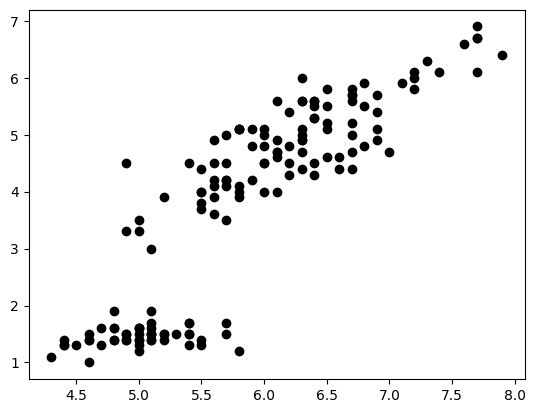

In [ ]:
#Plotting the raw data before clustering
plt.scatter(X[:,0] , X[:,1] , color = 'black')
plt.show()

In [ ]:
# Run the Kmeans algorithm using all 4 features
X = iris.data[:,:]
km = KMeans(n_clusters=3, n_init= "auto")
label = km.fit_predict(X)
print(label)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 1 2 2 2 2 1 2 2 2 2
 2 2 1 1 2 2 2 2 1 2 1 2 1 2 2 1 1 2 2 2 2 2 1 2 2 2 2 1 2 2 2 1 2 2 2 1 2
 2 1]


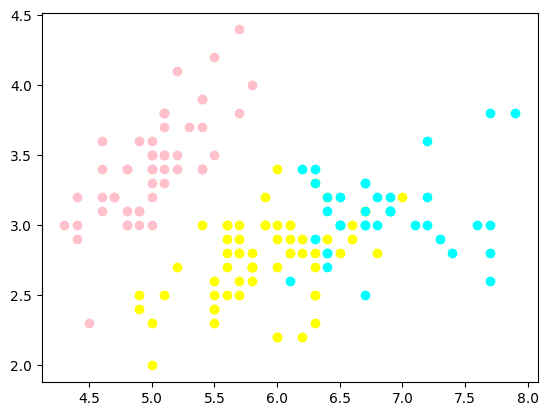

In [ ]:
#Plotting the results of clustering
plt.scatter(X[label == 0][:,0] , X[label == 0][:,1] , color = 'pink')
plt.scatter(X[label == 1][:,0] , X[label == 1][:,1] , color = 'yellow')
plt.scatter(X[label == 2][:,0] , X[label == 2][:,1] , color = 'cyan')
plt.show()

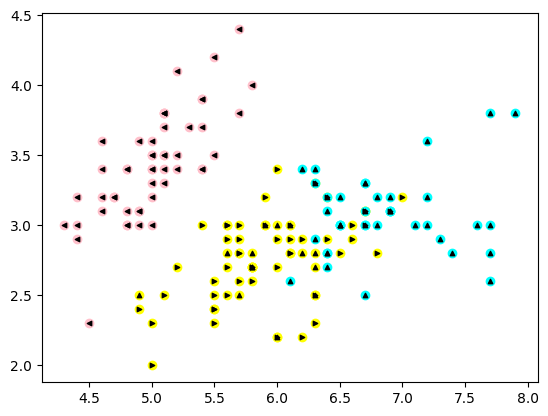

In [ ]:
#Plotting the 3 classes found by K Means clustering vs. the actual class labels
#Plot of KMeans class labels with K = 3 using colored circles.  
plt.scatter(X[label == 0][:,0] , X[label == 0][:,1] , color = 'pink')
plt.scatter(X[label == 1][:,0] , X[label == 1][:,1] , color = 'yellow')
plt.scatter(X[label == 2][:,0] , X[label == 2][:,1] , color = 'cyan')

#Plot of actual class labels using <, >, ^.  
plt.scatter(X[y == 0][:,0] , X[y == 0][:,1] , marker = "<", color = 'black', s= 10)
plt.scatter(X[y == 1][:,0] , X[y == 1][:,1] , marker = ">", color = 'black', s= 10)
plt.scatter(X[y == 2][:,0] , X[y == 2][:,1] , marker = "^", color = 'black', s= 10)
plt.show()

Text(0, 0.5, 'Sum of squared distance')

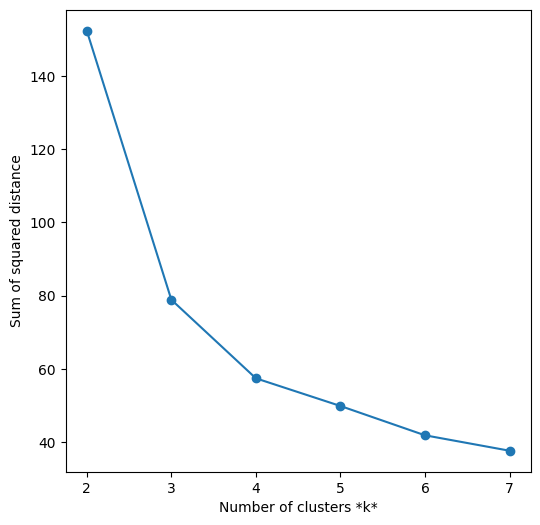

In [ ]:
# Finding Elbow 
# Run the Kmeans algorithm at various values of K to find elbow for best K
sse = []
list_k = [2,3,4,5,6,7]

for k in list_k:
    km = KMeans(n_clusters=k, n_init= "auto")
    km.fit(X)
    sse.append(km.inertia_)

# Plot sse against k
plt.figure(figsize=(6, 6))
plt.plot(list_k, sse, '-o')
plt.xlabel(r'Number of clusters *k*')
plt.ylabel('Sum of squared distance')

2.1

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


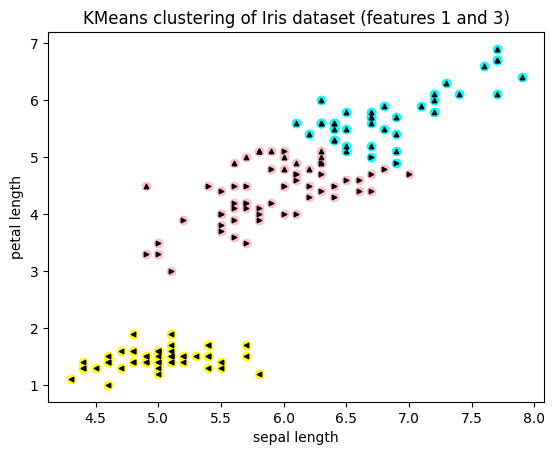

In [49]:
#copied from https://towardsdatascience.com/k-means-clustering-algorithm-applications-evaluation-methods-and-drawbacks-aa03e644b48a
import matplotlib.pyplot as plt
from matplotlib.image import imread
from sklearn.cluster import KMeans, SpectralClustering
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_samples, silhouette_score
from sklearn.datasets import load_iris
import numpy as np

# Loading all features 0, 1, 2, 3 of the data
iris = load_iris()
X = iris.data[:, [0,1,2,3]]
X13 = iris.data[:, [0,2]]

# Cluster the data using KMeans with K=3
kmeans = KMeans(n_clusters=3, random_state=1)
kmeans.fit(X)
labels = kmeans.labels_

# Create a scatter plot with markers for known training classes and colors for the computed clusters
plt.scatter(X13[labels==0][:,0], X13[labels==0][:,1], color='pink')
plt.scatter(X13[labels==1][:,0], X13[labels==1][:,1], color='yellow')
plt.scatter(X13[labels==2][:,0], X13[labels==2][:,1], color='cyan')
plt.scatter(X13[iris.target==0][:,0], X13[iris.target==0][:,1], marker='<', color='black', s=10)
plt.scatter(X13[iris.target==1][:,0], X13[iris.target==1][:,1], marker='>', color='black', s=10)
plt.scatter(X13[iris.target==2][:,0], X13[iris.target==2][:,1], marker='^', color='black', s=10)

# Add axis labels and title
plt.xlabel('sepal length')
plt.ylabel('petal length')
plt.title('KMeans clustering of Iris dataset (features 1 and 3)')
plt.show()

2.2

In [50]:
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(iris.target, labels)
error_rate = 1 - accuracy
print("Accuracy of KMeans clustering with 2 features: {:.2f}%".format(accuracy*100))
print("Percentage of misclassified data points: {:.2f}%".format(error_rate*100))

Accuracy of KMeans clustering with 2 features: 24.00%
Percentage of misclassified data points: 76.00%


2.3

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


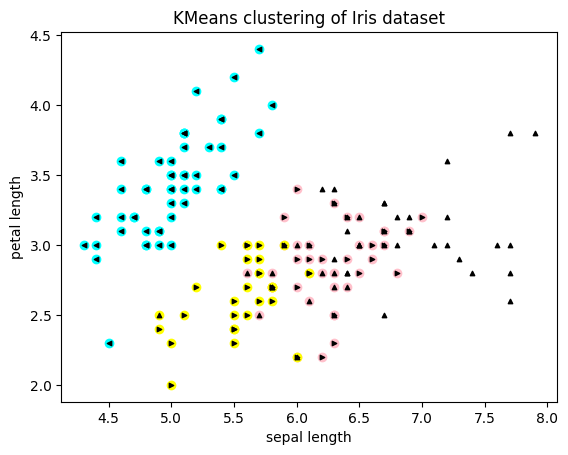

In [30]:
# Cluster the data using KMeans with K=3
kmeans = KMeans(n_clusters=4, random_state=1)
kmeans.fit(X)
labels = kmeans.labels_

# Create a scatter plot with markers for known training classes and colors for the computed clusters
plt.scatter(X[labels==0][:,0], X[labels==0][:,1], color='pink')
plt.scatter(X[labels==1][:,0], X[labels==1][:,1], color='yellow')
plt.scatter(X[labels==2][:,0], X[labels==2][:,1], color='cyan')
plt.scatter(X[iris.target==0][:,0], X[iris.target==0][:,1], marker='<', color='black', s=10)
plt.scatter(X[iris.target==1][:,0], X[iris.target==1][:,1], marker='>', color='black', s=10)
plt.scatter(X[iris.target==2][:,0], X[iris.target==2][:,1], marker='^', color='black', s=10)

# Add axis labels and title
plt.xlabel('sepal length')
plt.ylabel('petal length')
plt.title('KMeans clustering of Iris dataset')
plt.show()

2.4

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


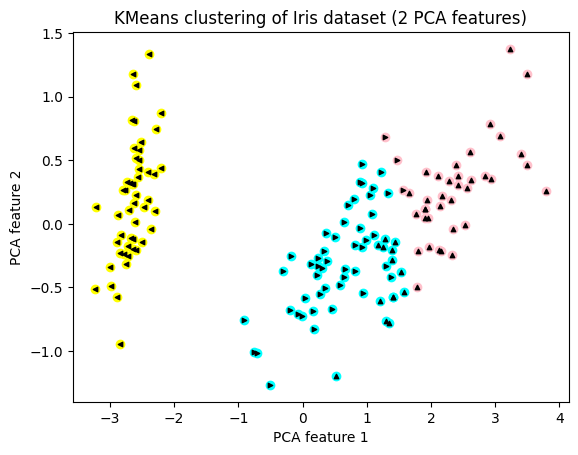

Accuracy of KMeans clustering with 2 features: 9.33%
Percentage of misclassified data points: 90.67%


In [47]:
from sklearn.decomposition import PCA

# Reduce the 4 features into 2 PCA features
pca = PCA(n_components=2)
X_pca = pca.fit_transform(iris.data)

# Cluster the data using KMeans with K=3
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans.fit(X_pca)
labels = kmeans.labels_

# Plot the clustered data with known training classes
plt.scatter(X_pca[labels==0][:,0], X_pca[labels==0][:,1], color='pink')
plt.scatter(X_pca[labels==1][:,0], X_pca[labels==1][:,1], color='yellow')
plt.scatter(X_pca[labels==2][:,0], X_pca[labels==2][:,1], color='cyan')
plt.scatter(X_pca[iris.target==0][:,0], X_pca[iris.target==0][:,1], marker='<', color='black', s=10)
plt.scatter(X_pca[iris.target==1][:,0], X_pca[iris.target==1][:,1], marker='>', color='black', s=10)
plt.scatter(X_pca[iris.target==2][:,0], X_pca[iris.target==2][:,1], marker='^', color='black', s=10)

# Add axis labels and title
plt.xlabel('PCA feature 1')
plt.ylabel('PCA feature 2')
plt.title('KMeans clustering of Iris dataset (2 PCA features)')

plt.show()
# Calculate percent misclassified
accuracy = accuracy_score(iris.target, labels)
error_rate = 1 - accuracy
print("Accuracy of KMeans clustering with 2 features: {:.2f}%".format(accuracy*100))
print("Percentage of misclassified data points: {:.2f}%".format(error_rate*100))

2.5

In [56]:
import numpy as np
from numpy.linalg import norm

class my_k_means:
    def __init__(self, K, X, max_iterations=100, centroid_move_epsilon=1e-4):
        self.K = K
        self.X = X
        self.max_iterations = max_iterations
        self.centroid_move_epsilon = centroid_move_epsilon
        
        # Initialize cluster centers randomly
        self.centroids = np.random.uniform(low=self.X.min(axis=0), high=self.X.max(axis=0), size=(self.K, self.X.shape[1]))
        
        # Initialize labels to -1
        self.labels = np.full(shape=self.X.shape[0], fill_value=-1)
        
    def fit(self):
        for i in range(self.max_iterations):
            # Assign data points to the nearest centroid
            distances = norm(self.X[:, np.newaxis] - self.centroids, axis=2)
            new_labels = np.argmin(distances, axis=1)
            
            # Check for convergence
            if np.all(new_labels == self.labels):
                break
                
            # Update cluster centers
            for j in range(self.K):
                mask = new_labels == j
                if np.sum(mask) > 0:
                    self.centroids[j] = np.mean(self.X[mask], axis=0)
            
            # Store the new labels
            self.labels = new_labels
        
    def predict(self, X_test):
        distances = norm(X_test[:, np.newaxis] - self.centroids, axis=2)
        return np.argmin(distances, axis=1)

# Fit my_k_means with K=3
kmeans = my_k_means(K=3, X=X)
kmeans.fit()

# Get predicted labels
labels = kmeans.predict(X)

# Calculate accuracy
accuracy = accuracy_score(iris.target, labels)
print("Accuracy of my_k_means clustering with 4 features: {:.2f}%".format(accuracy*100))


Accuracy of my_k_means clustering with 4 features: 24.00%
